# Data Visualization
EDA: exploratory data analysis
* Compute summary stats
* Generate data visualizations

## Goals of Data Visualization
1. Clearly and accurately represent data
1. Be creative, with the goal of improving readability
1. Label the units and points of interest

## Some Jargon
Charts: 2D visualization
* Plot: chart of data points (e.g. scatter plot)
* Graph: chart of math function (e.g. sine curve)

## Ways to use Matplotlib
1. Use the pyplot module: like a state machine with a "current figure"
1. Use OOP interface: maintain object references
1. Mix of the two

## Line Charts

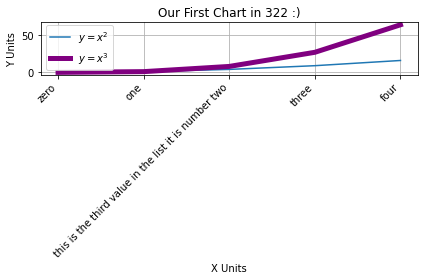

In [1]:
import matplotlib.pyplot as plt

def line_chart_example(x, y, y3):
    plt.figure() # make a new current figure
    plt.plot(x, y, label="$y=x^2$")
    plt.plot(x, y3, label="$y=x^3$", c="purple", lw=5)
    plt.legend()
    
    # lets add some labels
    plt.title("Our First Chart in 322 :)")
    plt.xlabel("X Units")
    plt.ylabel("Y Units")
    plt.grid(True)
    
    # change the xtick locations and labels
    xtick_labels = ["zero", "one", "this is the third value in the list it is number two", "three", "four"]
    plt.xticks(x, xtick_labels, rotation=45, horizontalalignment="right") # locations, labels
    
    # you can save a figure to a file
    plt.tight_layout()
    plt.savefig("line_chart.pdf")
    plt.show()
    
# we need data
# task: add another line to our figure for y = x^3
x = list(range(5))
y = [value ** 2 for value in x]
y3 = [value ** 3 for value in x]
line_chart_example(x, y, y3)

## Bar Charts

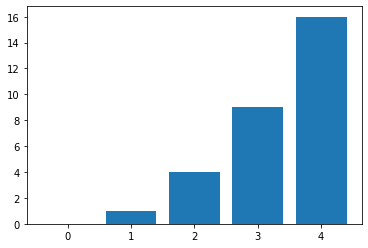

In [2]:
def bar_chart_example(x, y):
    plt.figure()
    plt.bar(x, y)
    plt.show()
    
bar_chart_example(x, y)

## Pie Charts

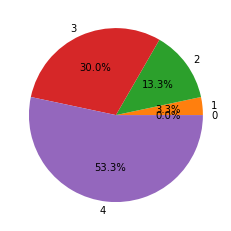

In [3]:
def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    
pie_chart_example(x, y)

In [4]:
import utils
# to programmatically force a reload of utils when the code cell
# executes:
import importlib
importlib.reload(utils)

<module 'utils' from '/home/U3-Data-Analysis/JupyterNotebookFunS2/utils.py'>

In [5]:
utils.dummy_function1()
utils.dummy_function2()

## Task
Bar chart and pie chart for model year counts using `get_frequencies()`

[74, 75, 76, 77]
[1, 2, 1, 2]


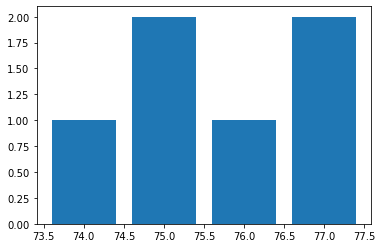

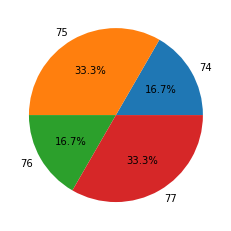

In [7]:
header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
          ["toyota corolla", 75, 2711],
          ["ford pinto", 76, 3025],
          ["toyota corolla", 77, 2789],
          ["ford mustang", 77, 3999],
          ["tesla", 74, 5000]]

# warmup 
modelyear_values, modelyear_counts = utils.get_frequencies(msrp_table, header, "ModelYear")
print(modelyear_values)
print(modelyear_counts)
bar_chart_example(modelyear_values, modelyear_counts)
pie_chart_example(modelyear_values, modelyear_counts)

## Histograms

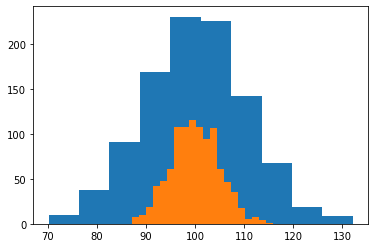

In [19]:
def histogram_example(data, data2):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data, bins=10) # default is 10
    plt.hist(data2, bins=20)
    plt.show()
    
# let's generate some random "normal" data
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
histogram_example(normal_data, normal_data2)
# task: add another histogram to the same figure mean=100, stdev=5
# prediction: new histogram be narrower or wider than the original (blue)?

## Box Plots

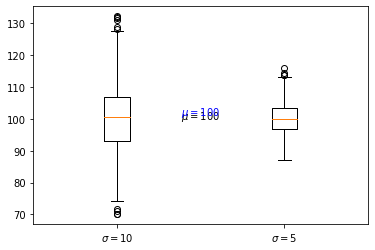

In [20]:
def box_plot_example(distributions, labels):
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # task: replace the 1 and 2 on the x axis with sigma=10 and sigma=5
    # add a parameters called labels to the function to do generally
    plt.xticks(list(range(1, len(labels) + 1)), labels)
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate("$\mu=100$", xy=(1.5, 100), xycoords="data", horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")

    plt.show()
box_plot_example([normal_data, normal_data2], ["$\sigma=10$", "$\sigma=5$"])

## Task
Let's create a boxplot for MSRP grouped by model year
* x-axis: model year (e.g. 74, 75, 76, 77)
* y-axis: MSRPs
* One box/whisker for each model year's MSRP distribution

Let's write `group_by(table, header, group_by_col_name)` and return a list of unique group names and a list of the corresponding group subtables

In [21]:
importlib.reload(utils)
modelyear_names, modelyear_subtables = utils.group_by(msrp_table, header, "ModelYear")
print(modelyear_names)
print(modelyear_subtables)

[74, 75, 76, 77]
[[['tesla', 74, 5000]], [['ford pinto', 75, 2769], ['toyota corolla', 75, 2711]], [['ford pinto', 76, 3025]], [['toyota corolla', 77, 2789], ['ford mustang', 77, 3999]]]
